<a href="https://colab.research.google.com/github/solivare/DeepNeuralNetworkUSS/blob/Sebastianjimenez/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 🔧 TAREA
#Explora el dataset e intenta responder:
#
#- ¿Qué variables tienen valores faltantes?
#Como se esta trabajando con el archivo credit_clean (indicado en las instrucciones:Cargar el dataset limpio), no se encuentran valores faltantes, esto se comprobo utlizando el codigo :
  #missing_values = df.isnull().sum()
  #missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
  #print("Variables con valores faltantes:")
  #print(missing_values)

#- ¿Qué variables parecen más correlacionadas con el target?
#Las variables con mayor correlación con SeriousDlqin2yrs son:
  #NumberOfTimes90DaysLate
  #NumberOfTime60-89DaysPastDueNotWorse
  #NumberOfTime30-59DaysPastDueNotWorse
  #Numberofdependents
  #Aunque las correlaciones no son muy altas en términos absolutos, estas variables reflejan directamente el historial de morosidad, lo cual es coherente con el objetivo del modelo.

#- ¿Hay valores extremos que deberías tratar?
#Sí. Se detectaron valores extremos o inusuales en:
  #DebtRatio: más de 1,100 registros con valor 0, lo cual puede ser válido pero también podría indicar datos faltantes codificados.
  #RevolvingUtilizationOfUnsecuredLines: más de 2,100 registros con valor 0, lo que podría representar no uso de líneas de crédito o datos faltantes.
# También hay valores mayores a 1 en esta variable, lo cual puede ser inusual y merece revision

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de estilo
sns.set(style="whitegrid")

In [ ]:
# 📥 Cargar el dataset limpio
df = pd.read_csv("/content/credit_clean.csv")

# 👁️ Primer vistazo a los datos
df.head()

# 🧼 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40016 entries, 0 to 40015
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      40016 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  40016 non-null  float64
 2   age                                   40016 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  40016 non-null  int64  
 4   DebtRatio                             40016 non-null  float64
 5   MonthlyIncome                         40016 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       40016 non-null  int64  
 7   NumberOfTimes90DaysLate               40016 non-null  int64  
 8   NumberRealEstateLoansOrLines          40016 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  40016 non-null  int64  
 10  NumberOfDependents                    40016 non-null  float64
dtypes: float64(4), 

Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


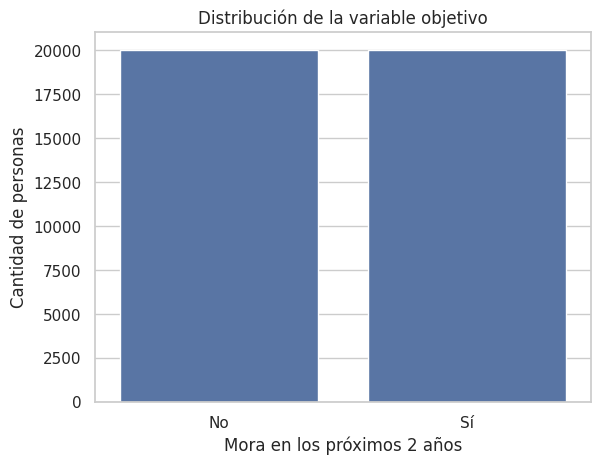

In [ ]:
# 🔍 Distribución de la variable objetivo
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

In [ ]:
# 📊 Estadísticas descriptivas
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000
mean,0.500200,4.687565,49.267893,1.278888,331.312144,6057.155913,8.216263,1.055203,1.000925,0.920332,0.833742
std,0.500006,188.643899,14.293645,8.290821,2093.376551,6878.873207,5.400697,8.293279,1.267900,8.270203,1.165660
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.072469,39.000000,0.000000,0.182940,3550.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.441448,48.000000,0.000000,0.390770,5443.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.941515,59.000000,1.000000,0.868648,6812.750000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,101.000000,98.000000,326442.000000,699530.000000,57.000000,98.000000,29.000000,98.000000,9.000000


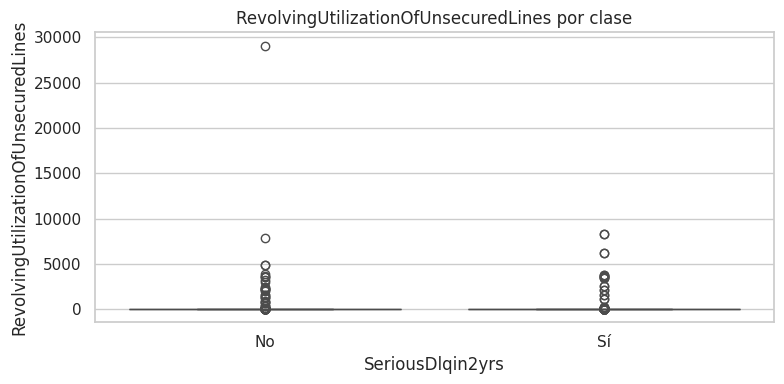

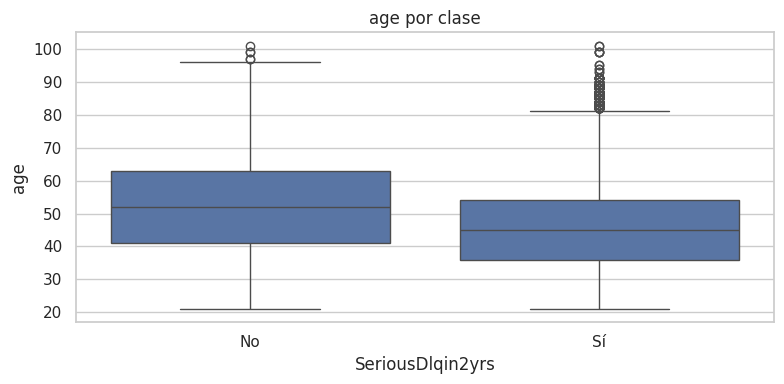

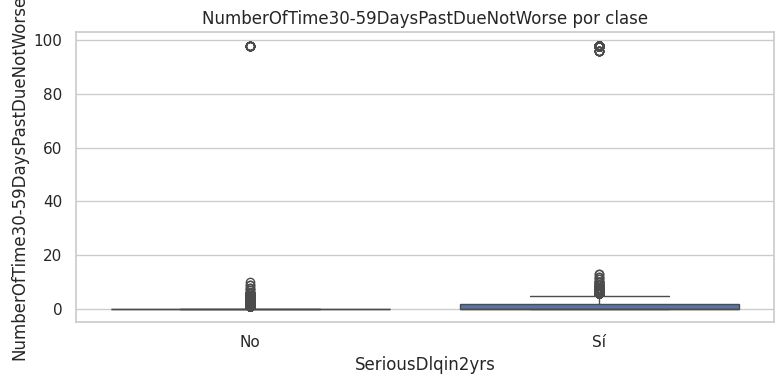

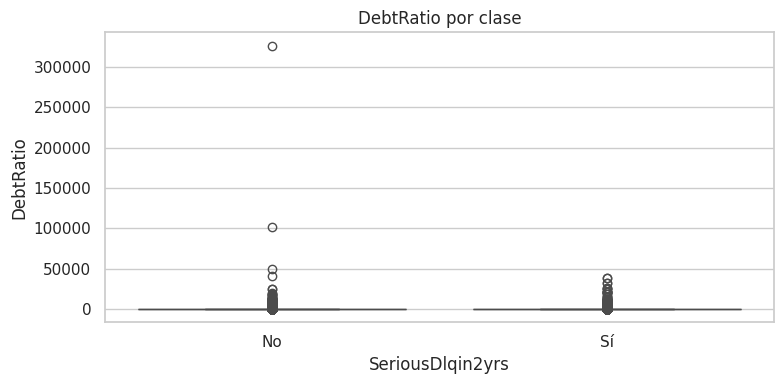

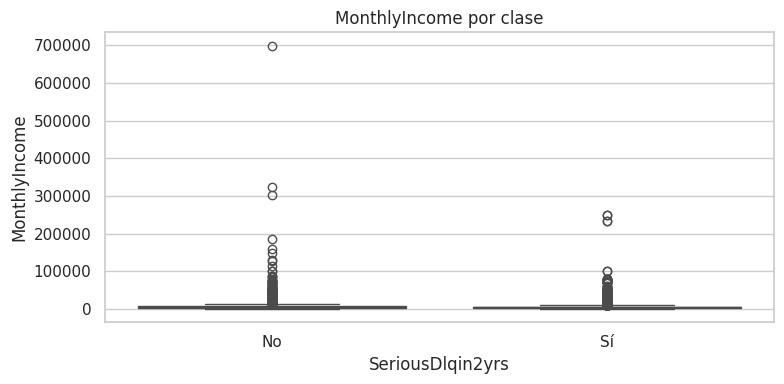

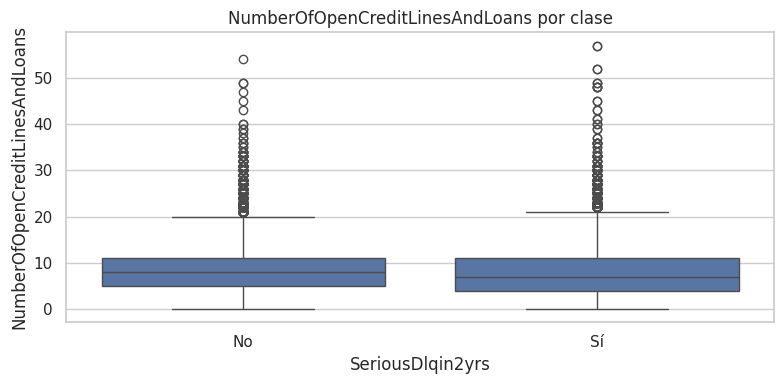

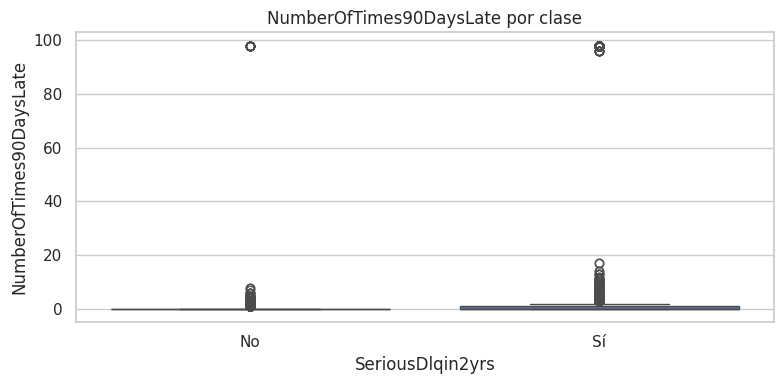

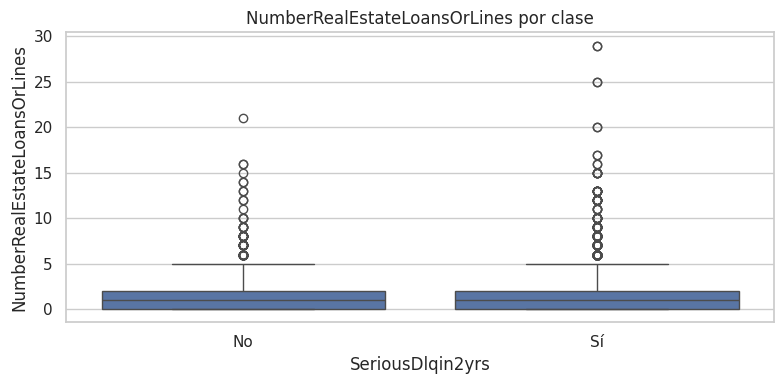

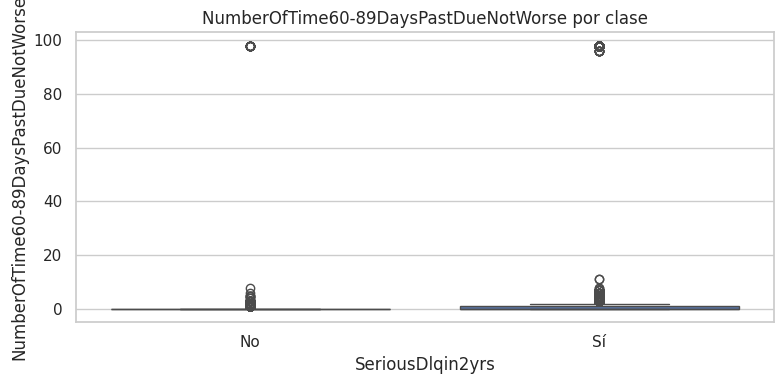

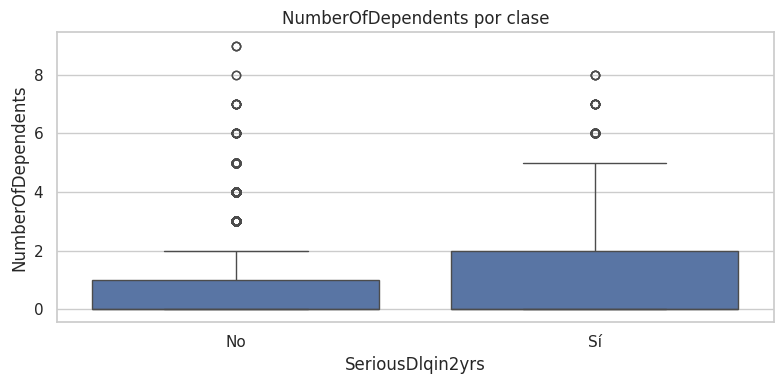

In [ ]:
# 📉 Boxplots por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="SeriousDlqin2yrs", y=col, data=df)
        plt.title(f"{col} por clase")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

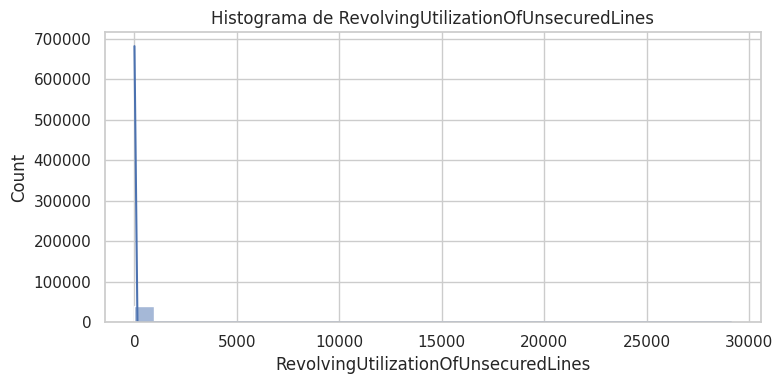

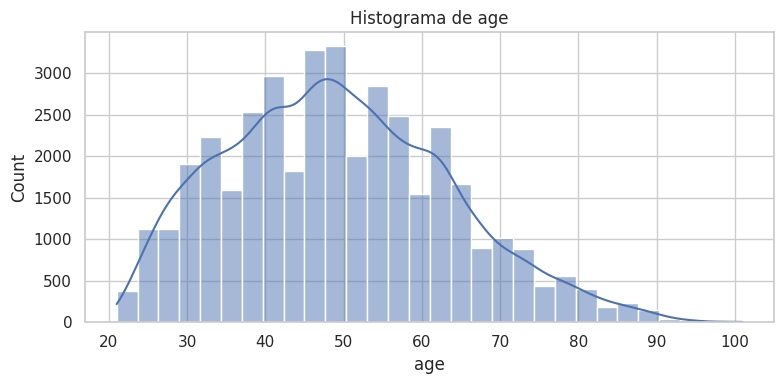

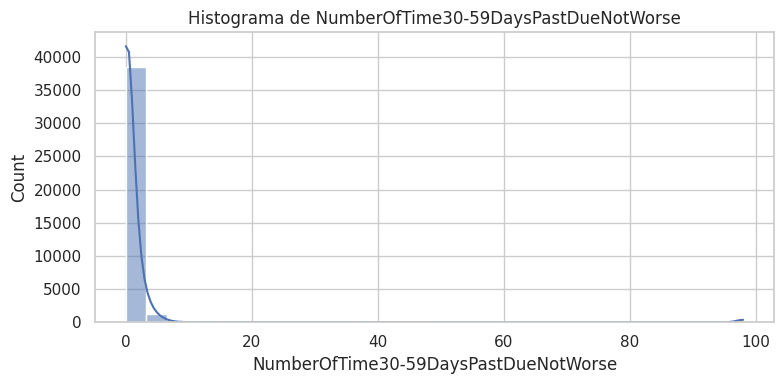

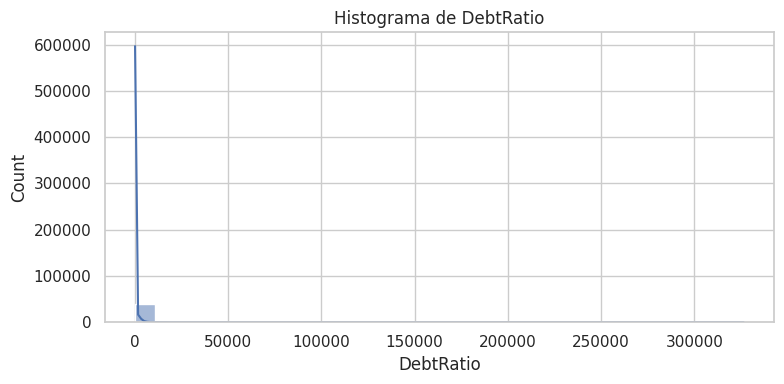

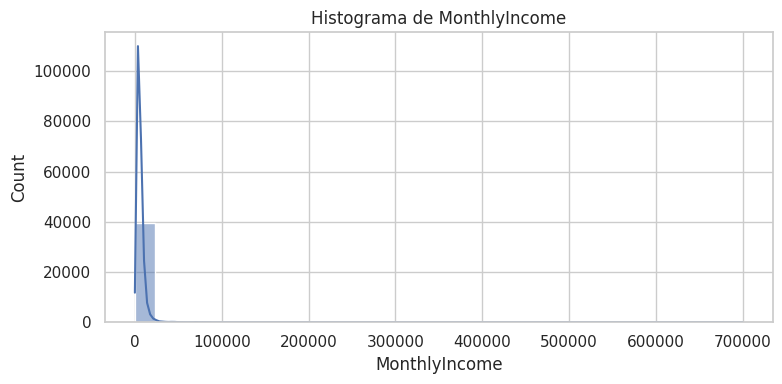

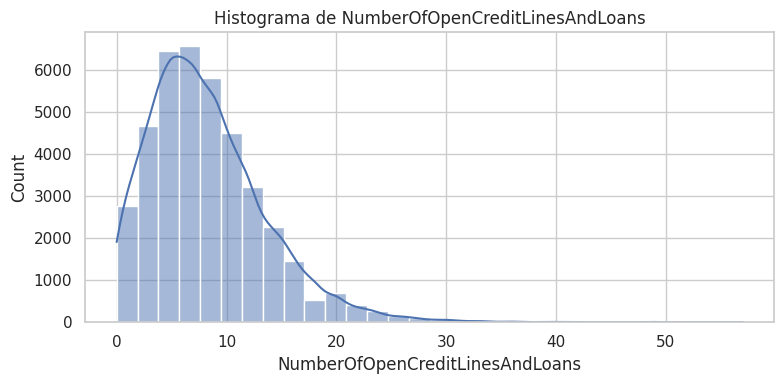

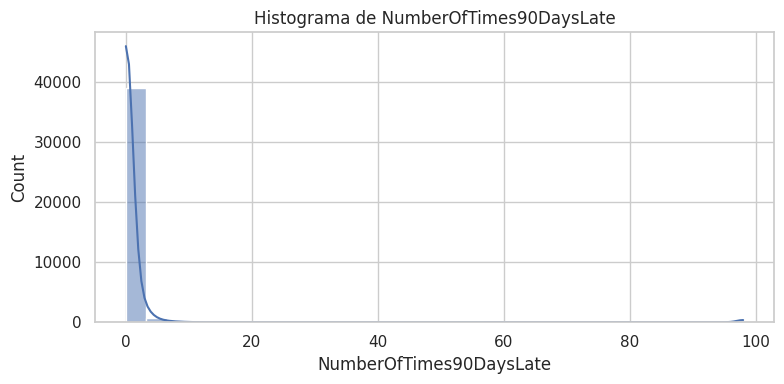

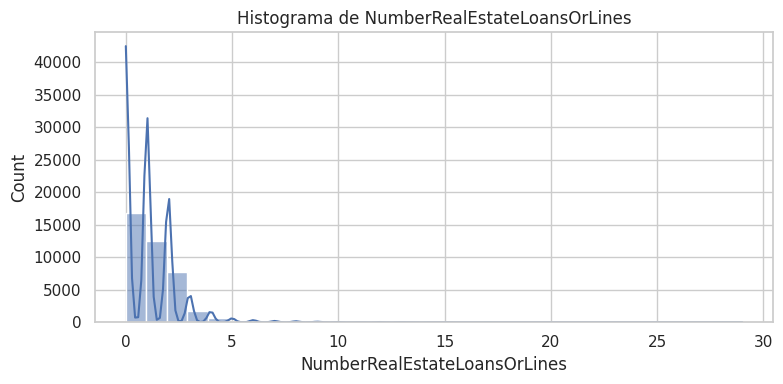

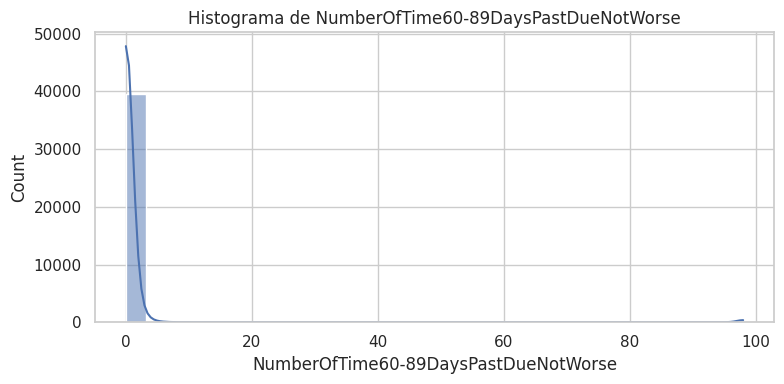

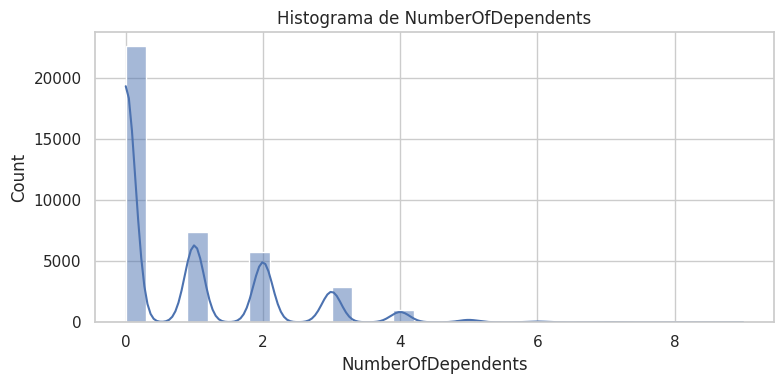

In [ ]:
# 🧠 TODO: Agregar histograma por variable (para tarea)

#  Histogramas por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Histograma de {col}")
        plt.tight_layout()
        plt.show()


In [ ]:
# 🔍 Valores faltantes
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Variables con valores faltantes:")
print(missing_values)


Variables con valores faltantes:
Series([], dtype: int64)


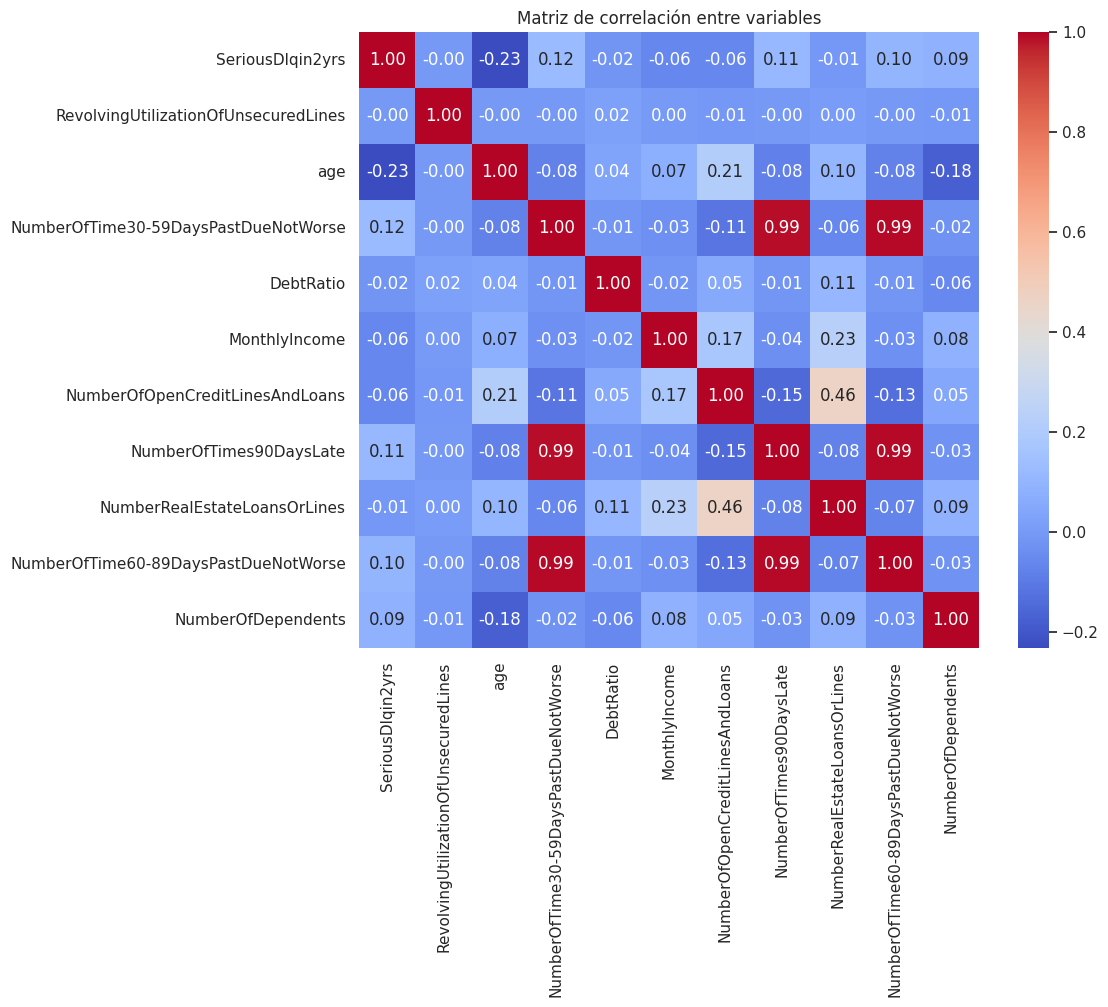

In [ ]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

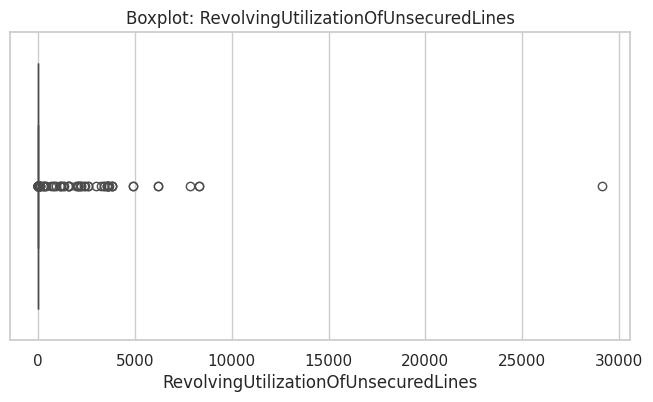

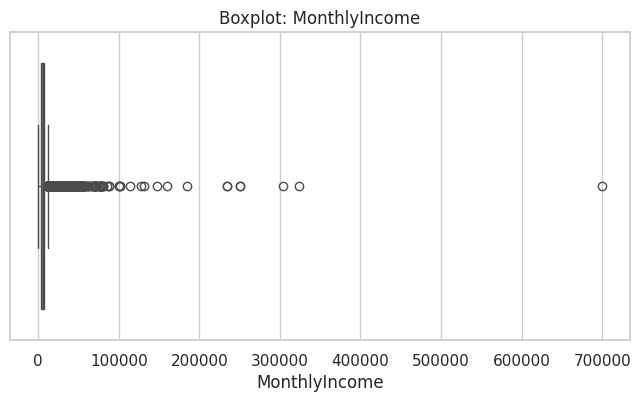

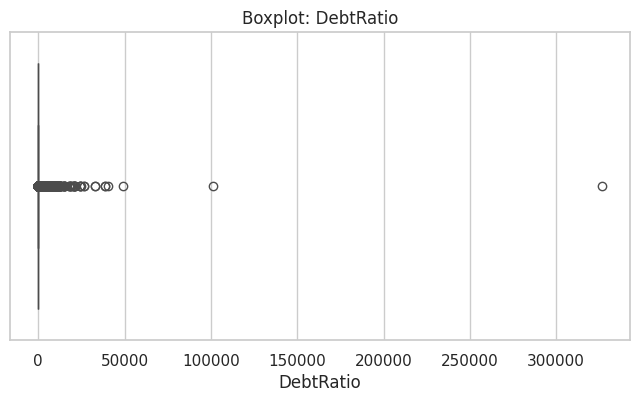

In [ ]:
# 📝 TODO: Identificar outliers o valores extremos (completar)
# - Analizar la columna RevolvingUtilizationOfUnsecuredLines
# - Verificar valores inusuales en MonthlyIncome o DebtRatio
# 🎯 Análisis de outliers en columnas seleccionadas

# RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["RevolvingUtilizationOfUnsecuredLines"])
plt.title("Boxplot: RevolvingUtilizationOfUnsecuredLines")
plt.show()

# MonthlyIncome
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["MonthlyIncome"])
plt.title("Boxplot: MonthlyIncome")
plt.show()

# DebtRatio
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["DebtRatio"])
plt.title("Boxplot: DebtRatio")
plt.show()


Registros con ingresos mensuales inusualmente altos: 401
Registros con DebtRatio mayor a 1: 9198


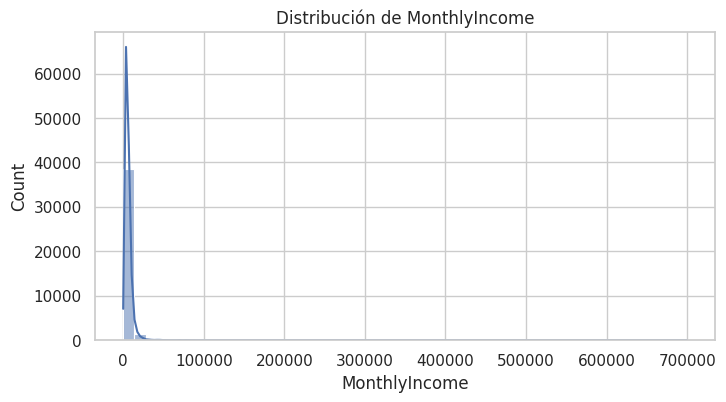

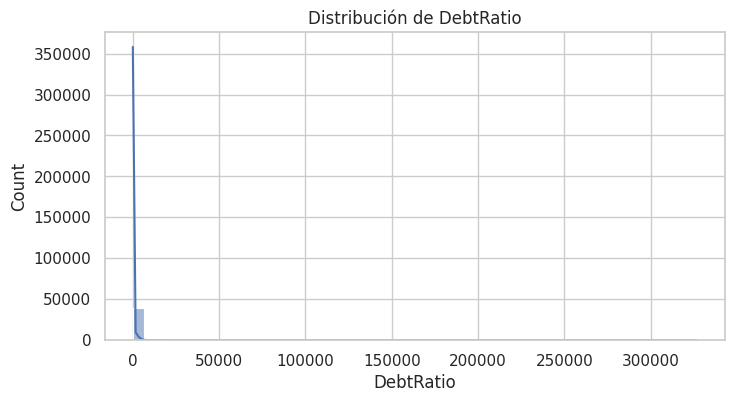

In [ ]:
# 📌 Verificación de valores inusuales

# MonthlyIncome: valores extremadamente altos
high_income = df[df["MonthlyIncome"] > df["MonthlyIncome"].quantile(0.99)]
print(f"Registros con ingresos mensuales inusualmente altos: {len(high_income)}")

# DebtRatio: valores mayores a 1 (pueden ser inusuales dependiendo del contexto)
high_debt_ratio = df[df["DebtRatio"] > 1]
print(f"Registros con DebtRatio mayor a 1: {len(high_debt_ratio)}")

# Visualización
plt.figure(figsize=(8, 4))
sns.histplot(df["MonthlyIncome"], bins=50, kde=True)
plt.title("Distribución de MonthlyIncome")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df["DebtRatio"], bins=50, kde=True)
plt.title("Distribución de DebtRatio")
plt.show()


In [ ]:
# Filtrar registros con DebtRatio > 1
debt_ratio_gt_1 = df[df["DebtRatio"] > 1]
count_debt_ratio_gt_1 = len(debt_ratio_gt_1)

# Filtrar registros con DebtRatio > 1000
debt_ratio_gt_1000 = df[df["DebtRatio"] > 1000]
count_debt_ratio_gt_1000 = len(debt_ratio_gt_1000)

# Filtrar registros con RevolvingUtilizationOfUnsecuredLines > 1
revolving_util_gt_1 = df[df["RevolvingUtilizationOfUnsecuredLines"] > 1]
count_revolving_util_gt_1 = len(revolving_util_gt_1)

# Imprimir resultados
print(f"Registros con DebtRatio > 1: {count_debt_ratio_gt_1}")
print(f"Registros con DebtRatio > 1000: {count_debt_ratio_gt_1000}")
print(f"Registros con RevolvingUtilizationOfUnsecuredLines > 1: {count_revolving_util_gt_1}")

# Mostrar ejemplos
print("\nEjemplos de registros con DebtRatio > 1000:")
print(debt_ratio_gt_1000.head())

print("\nEjemplos de registros con RevolvingUtilizationOfUnsecuredLines > 1:")
print(revolving_util_gt_1.head())


Registros con DebtRatio > 1: 9198
Registros con DebtRatio > 1000: 3936
Registros con RevolvingUtilizationOfUnsecuredLines > 1: 2767

Ejemplos de registros con DebtRatio > 1000:
    SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
7                  1                              0.084639   55   
23                 0                              0.213150   65   
32                 0                              0.580630   63   
36                 0                              0.565844   34   
39                 0                              0.000000   41   

    NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
7                                      2     1388.0         5443.0   
23                                     0     1491.0         5443.0   
32                                     0     2379.0         5443.0   
36                                     0     1286.0         5443.0   
39                                     0     5319.0         5443.0   


In [ ]:
# 🔗 Correlación con la variable objetivo
correlations = df.corr()["SeriousDlqin2yrs"].drop("SeriousDlqin2yrs").sort_values(ascending=False)
print("Correlación con el target:")
print(correlations)


Correlación con el target:
NumberOfTime30-59DaysPastDueNotWorse    0.121411
NumberOfTimes90DaysLate                 0.112439
NumberOfTime60-89DaysPastDueNotWorse    0.097171
NumberOfDependents                      0.085148
RevolvingUtilizationOfUnsecuredLines   -0.001666
NumberRealEstateLoansOrLines           -0.008377
DebtRatio                              -0.017043
NumberOfOpenCreditLinesAndLoans        -0.059254
MonthlyIncome                          -0.061224
age                                    -0.232293
Name: SeriousDlqin2yrs, dtype: float64


In [ ]:
# 🧩 Comentarios
# - ¿Qué variables parecen más correlacionadas con la clase objetivo?
# Las variables relacionadas con atrasos en pagos son las más correlacionadas con el target, como se esperaba.

# - ¿Hay variables que podrían necesitar transformación o escalamiento?
# Sí: DebtRatio, MonthlyIncome y RevolvingUtilizationOfUnsecuredLines presentan distribuciones sesgadas y valores extremos, segun los histogramas.

# - ¿Existe desbalance significativo?
# No. La variable SeriousDlqin2yrs está equilibrada, con aproximadamente 50% de registros en cada clase.
# Esto significa que no es necesario aplicar técnicas de balanceo como SMOTE o undersampling. Se puede usar accuracy junto con otras métricas como F1-score o AUC-ROC sin riesgo de sesgo por desbalance.

In [ ]:
### 📊 Pregunta de reflexión
#Después del análisis exploratorio:
#
#- ¿Qué variable crees que será más relevante para predecir el default?
# Las variables relacionadas con morosidad previa (NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, etc.) probablemente serán las más relevantes, ya que reflejan directamente el comportamiento crediticio pasado.

#- ¿Alguna variable presenta un comportamiento que te parezca inesperado?
# Sí, se identifican comportamientos inusuales en:
  #DebtRatio: Hay 9,198 registros con valor mayor a 1, lo cual puede ser válido en contextos de sobreendeudamiento.
# RevolvingUtilizationOfUnsecuredLines:Se encontraron 2,767 registros con valores mayores a 1, lo que implica un uso superior al 100% de las líneas de crédito no garantizadas. Aunque esto podría representar sobregiros o líneas de crédito mal gestionadas, también puede ser un indicio de datos anómalos.